In [ ]:

import pandas as pd
import gc
import os

from google.colab import drive
drive.mount('/content/drive')


os.chdir('/content/drive/MyDrive/신용카드고객')

train_df1_splits = ["train", "test"]


train_df1_categories = {
    "회원정보": {"folder": "1.회원정보", "suffix": "회원정보", "var_prefix": "customer"},
    "신용정보": {"folder": "2.신용정보", "suffix": "신용정보", "var_prefix": "credit"},
    "승인매출정보": {"folder": "3.승인매출정보", "suffix": "승인매출정보", "var_prefix": "sales"},
    "청구정보": {"folder": "4.청구입금정보", "suffix": "청구정보", "var_prefix": "billing"},
    "잔액정보": {"folder": "5.잔액정보", "suffix": "잔액정보", "var_prefix": "balance"},
    "채널정보": {"folder": "6.채널정보", "suffix": "채널정보", "var_prefix": "channel"},
    "마케팅정보": {"folder": "7.마케팅정보", "suffix": "마케팅정보", "var_prefix": "marketing"},
    "성과정보": {"folder": "8.성과정보", "suffix": "성과정보", "var_prefix": "performance"}
}
months = ['07', '08', '09', '10', '11', '12']

for split in train_df1_splits:
    for category, info in train_df1_categories.items():
        folder = info["folder"]
        suffix = info["suffix"]
        var_prefix = info["var_prefix"]

        for month in months:
            # 파일명 형식: 2018{month}_{split}_{suffix}.parquet
            file_path = f"./{split}/{folder}/2018{month}_{split}_{suffix}.parquet"
            # 변수명 형식: {var_prefix}_{split}_{month}
            variable_name = f"{var_prefix}_{split}_{month}"
            globals()[variable_name] = pd.read_parquet(file_path)
            print(f"{variable_name} is loaded from {file_path}")

gc.collect()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
customer_train_07 is loaded from ./train/1.회원정보/201807_train_회원정보.parquet
customer_train_08 is loaded from ./train/1.회원정보/201808_train_회원정보.parquet
customer_train_09 is loaded from ./train/1.회원정보/201809_train_회원정보.parquet
customer_train_10 is loaded from ./train/1.회원정보/201810_train_회원정보.parquet
customer_train_11 is loaded from ./train/1.회원정보/201811_train_회원정보.parquet
customer_train_12 is loaded from ./train/1.회원정보/201812_train_회원정보.parquet
credit_train_07 is loaded from ./train/2.신용정보/201807_train_신용정보.parquet
credit_train_08 is loaded from ./train/2.신용정보/201808_train_신용정보.parquet
credit_train_09 is loaded from ./train/2.신용정보/201809_train_신용정보.parquet
credit_train_10 is loaded from ./train/2.신용정보/201810_train_신용정보.parquet
credit_train_11 is loaded from ./train/2.신용정보/201811_train_신용정보.parquet
credit_train_12 is loaded from ./train/2.신용정보/201812_train_신용정보.par

0

In [ ]:
# 데이터 유형별 설정
info_categories = ["customer", "credit", "sales", "billing", "balance", "channel", "marketing", "performance"]

# 월 설정
months = ['07', '08', '09', '10', '11', '12']

In [ ]:
#### Train ####

# 각 유형별로 월별 데이터를 합쳐서 새로운 변수에 저장
train_dfs = {}

for prefix in info_categories:
    # globals()에서 동적 변수명으로 데이터프레임들을 가져와 리스트에 저장
    df_list = [globals()[f"{prefix}_train_{month}"] for month in months]
    train_dfs[f"{prefix}_train_df"] = pd.concat(df_list, axis=0)
    gc.collect()
    print(f"{prefix}_train_df is created with shape: {train_dfs[f'{prefix}_train_df'].shape}")


customer_train_df = train_dfs["customer_train_df"]
credit_train_df   = train_dfs["credit_train_df"]
sales_train_df    = train_dfs["sales_train_df"]
billing_train_df  = train_dfs["billing_train_df"]
balance_train_df  = train_dfs["balance_train_df"]
channel_train_df  = train_dfs["channel_train_df"]
marketing_train_df= train_dfs["marketing_train_df"]
performance_train_df = train_dfs["performance_train_df"]

gc.collect()

customer_train_df is created with shape: (2400000, 78)
credit_train_df is created with shape: (2400000, 42)
sales_train_df is created with shape: (2400000, 406)
billing_train_df is created with shape: (2400000, 46)
balance_train_df is created with shape: (2400000, 82)
channel_train_df is created with shape: (2400000, 105)
marketing_train_df is created with shape: (2400000, 64)
performance_train_df is created with shape: (2400000, 49)


0

In [ ]:
#### Test ####

# test 데이터에 대해 train과 동일한 방법 적용
test_dfs = {}

for prefix in info_categories:
    df_list = [globals()[f"{prefix}_test_{month}"] for month in months]
    test_dfs[f"{prefix}_test_df"] = pd.concat(df_list, axis=0)
    gc.collect()
    print(f"{prefix}_test_df is created with shape: {test_dfs[f'{prefix}_test_df'].shape}")


customer_test_df = test_dfs["customer_test_df"]
credit_test_df   = test_dfs["credit_test_df"]
sales_test_df    = test_dfs["sales_test_df"]
billing_test_df  = test_dfs["billing_test_df"]
balance_test_df  = test_dfs["balance_test_df"]
channel_test_df  = test_dfs["channel_test_df"]
marketing_test_df= test_dfs["marketing_test_df"]
performance_test_df = test_dfs["performance_test_df"]

gc.collect()

customer_test_df is created with shape: (600000, 77)
credit_test_df is created with shape: (600000, 42)
sales_test_df is created with shape: (600000, 406)
billing_test_df is created with shape: (600000, 46)
balance_test_df is created with shape: (600000, 82)
channel_test_df is created with shape: (600000, 105)
marketing_test_df is created with shape: (600000, 64)
performance_test_df is created with shape: (600000, 49)


0

In [ ]:
#### Train ####

train_df = customer_train_df.merge(credit_train_df, on=['기준년월', 'ID'], how='left')
print("Step1 저장 완료: train_step1, shape:", train_df.shape)
del customer_train_df, credit_train_df
gc.collect()

# 이후 merge할 데이터프레임 이름과 단계 정보를 리스트에 저장
merge_list = [
    ("sales_train_df",    "Step2"),
    ("billing_train_df",  "Step3"),
    ("balance_train_df",  "Step4"),
    ("channel_train_df",  "Step5"),
    ("marketing_train_df","Step6"),
    ("performance_train_df", "최종")
]

# 나머지 단계 merge
for df_name, step in merge_list:
    # globals()로 동적 변수 접근하여 merge 수행
    train_df = train_df.merge(globals()[df_name], on=['기준년월', 'ID'], how='left')
    print(f"{step} 저장 완료: train_{step}, shape:", train_df.shape)
    # 사용한 변수는 메모리 해제를 위해 삭제
    del globals()[df_name]
    gc.collect()

Step1 저장 완료: train_step1, shape: (2400000, 118)
Step2 저장 완료: train_Step2, shape: (2400000, 522)
Step3 저장 완료: train_Step3, shape: (2400000, 566)
Step4 저장 완료: train_Step4, shape: (2400000, 646)
Step5 저장 완료: train_Step5, shape: (2400000, 749)
Step6 저장 완료: train_Step6, shape: (2400000, 811)
최종 저장 완료: train_최종, shape: (2400000, 858)


In [ ]:
#### Test ####

test_df = customer_test_df.merge(credit_test_df, on=['기준년월', 'ID'], how='left')
print("Step1 저장 완료: test_step1, shape:", test_df.shape)
del customer_test_df, credit_test_df
gc.collect()

# 이후 merge할 데이터프레임 이름과 단계 정보를 리스트에 저장
merge_list = [
    ("sales_test_df",    "Step2"),
    ("billing_test_df",  "Step3"),
    ("balance_test_df",  "Step4"),
    ("channel_test_df",  "Step5"),
    ("marketing_test_df","Step6"),
    ("performance_test_df", "최종")
]

# 나머지 단계 merge
for df_name, step in merge_list:
    # globals()로 동적 변수 접근하여 merge 수행
    test_df = test_df.merge(globals()[df_name], on=['기준년월', 'ID'], how='left')
    print(f"{step} 저장 완료: test_{step}, shape:", test_df.shape)
    # 사용한 변수는 메모리 해제를 위해 삭제
    del globals()[df_name]
    gc.collect()

Step1 저장 완료: test_step1, shape: (600000, 117)
Step2 저장 완료: test_Step2, shape: (600000, 521)
Step3 저장 완료: test_Step3, shape: (600000, 565)
Step4 저장 완료: test_Step4, shape: (600000, 645)
Step5 저장 완료: test_Step5, shape: (600000, 748)
Step6 저장 완료: test_Step6, shape: (600000, 810)
최종 저장 완료: test_최종, shape: (600000, 857)


In [ ]:
import pandas as pd
import gc
import os

from google.colab import drive
drive.mount('/content/drive')
train_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/train_df.csv')
test_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/test_df.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-0ccdb31a5380>:7: DtypeWarning: Columns (300,385) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/train_df.csv')
<ipython-input-1-0ccdb31a5380>:8: DtypeWarning: Columns (299) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/test_df.csv')


In [ ]:
train_summation=train_df.head(1000)
train_summation.to_csv('/content/drive/MyDrive/신용카드고객/train_summation.csv')

In [ ]:
train_df1=train_df.copy()
test_df1=test_df.copy()

In [ ]:
import pandas as pd
total_rows = 2400000

# 1. 결측치 개수 계산
missing_counts = train_df.isnull().sum()

# 2. 결측치 비율 계산 (%)
missing_ratios = (missing_counts / total_rows) * 100

# 3. 결측치가 있는 변수만 필터링
missing_train_df = pd.DataFrame({
    '결측치 개수': missing_counts,
    '결측 비율 (%)': missing_ratios
})
missing_train_df = missing_train_df[missing_train_df['결측치 개수'] > 0]  # 결측치가 0인 변수 제외

# 4. 결과 정렬 (결측 비율 높은 순)
missing_train_df = missing_train_df.sort_values(by='결측 비율 (%)', ascending=False)

# 5. 출력
print(f"총 데이터 수: {total_rows}")
print("\n결측치가 있는 변수 목록:")
print(missing_train_df)


총 데이터 수: 2400000

결측치가 있는 변수 목록:
                 결측치 개수  결측 비율 (%)
연체일자_B0M        2394336  99.764000
_3순위여유업종        2377725  99.071875
_3순위납부업종        2310187  96.257792
_2순위여유업종        2302286  95.928583
_3순위교통업종        2045455  85.227292
_2순위납부업종        2033640  84.735000
최종카드론_대출일자      1988330  82.847083
_1순위여유업종        1987260  82.802500
최종카드론_신청경로코드    1958226  81.592750
최종카드론_금융상환방식코드  1958126  81.588583
RV신청일자          1951236  81.301500
_2순위교통업종        1656423  69.017625
OS구분코드          1633566  68.065250
_3순위쇼핑업종        1312267  54.677792
_1순위납부업종        1216263  50.677625
_1순위교통업종        1164494  48.520583
_2순위쇼핑업종        1135042  47.293417
_3순위업종          1107898  46.162417
_2순위신용체크구분       958115  39.921458
_1순위쇼핑업종         922663  38.444292
_2순위업종           912725  38.030208
혜택수혜율_B0M        555522  23.146750
_1순위업종           539992  22.499667
최종유효년월_신용_이용     534231  22.259625
혜택수혜율_R3M        488746  20.364417
가입통신회사코드         387570  16.148750
직장시도명            24496

In [ ]:
print(len(train_df.loc[train_df['_3순위여유업종_이용금액'] == 0, '_3순위여유업종']))
print(len(train_df.loc[train_df['_3순위납부업종_이용금액'] == 0, '_3순위납부업종']))
print(len(train_df.loc[train_df['_2순위여유업종_이용금액'] == 0, '_2순위여유업종']))
print(len(train_df.loc[train_df['_3순위교통업종_이용금액'] == 0, '_3순위교통업종']))
print(len(train_df.loc[train_df['_2순위납부업종_이용금액'] == 0, '_2순위납부업종']))
print(len(train_df.loc[train_df['_1순위여유업종_이용금액'] == 0, '_1순위여유업종']))
print(len(train_df.loc[train_df['_2순위교통업종_이용금액'] == 0, '_2순위교통업종']))
print(len(train_df.loc[train_df['_3순위쇼핑업종_이용금액'] == 0, '_3순위쇼핑업종']))
print(len(train_df.loc[train_df['_1순위납부업종_이용금액'] == 0, '_1순위납부업종']))
print(len(train_df.loc[train_df['_1순위교통업종_이용금액'] == 0, '_1순위교통업종']))
print(len(train_df.loc[train_df['_2순위쇼핑업종_이용금액'] == 0, '_2순위쇼핑업종']))
print(len(train_df.loc[train_df['_3순위업종_이용금액'] == 0, '_3순위업종']))
print(len(train_df.loc[train_df['_1순위쇼핑업종_이용금액'] == 0, '_1순위쇼핑업종']))
print(len(train_df.loc[train_df['_2순위업종_이용금액'] == 0, '_2순위업종']))
print(len(train_df.loc[train_df['_1순위업종_이용금액'] == 0, '_1순위업종']))


2377725
2310187
2302286
2045515
2033640
1987260
1656477
1312267
1216263
1164541
1135042
1107904
922663
912735
539998


In [ ]:
print((train_df['_3순위여유업종_이용금액'] == 0).sum())
print((train_df['_3순위납부업종_이용금액'] == 0).sum())
print((train_df['_2순위여유업종_이용금액'] == 0).sum())
print((train_df['_3순위교통업종_이용금액'] == 0).sum())
print((train_df['_2순위납부업종_이용금액'] == 0).sum())
print((train_df['_1순위여유업종_이용금액'] == 0).sum())
print((train_df['_2순위교통업종_이용금액'] == 0).sum())
print((train_df['_3순위쇼핑업종_이용금액'] == 0).sum())
print((train_df['_1순위납부업종_이용금액'] == 0).sum())
print((train_df['_1순위교통업종_이용금액'] == 0).sum())
print((train_df['_2순위쇼핑업종_이용금액'] == 0).sum())
print((train_df['_3순위업종_이용금액'] == 0).sum())
print((train_df['_1순위쇼핑업종_이용금액'] == 0).sum())
print((train_df['_2순위업종_이용금액'] == 0).sum())
print((train_df['_1순위업종_이용금액'] == 0).sum())


2377725
2310187
2302286
2045515
2033640
1987260
1656477
1312267
1216263
1164541
1135042
1107904
922663
912735
539998


In [ ]:
# 결측치를 '없음'으로 채우기
industry_list = [
    '_3순위여유업종',
    '_3순위납부업종',
    '_2순위여유업종',
    '_3순위교통업종',
    '_2순위납부업종',
    '_1순위여유업종',
    '_2순위교통업종',
    '_3순위쇼핑업종',
    '_1순위납부업종',
    '_1순위교통업종',
    '_2순위쇼핑업종',
    '_3순위업종',
    '_1순위쇼핑업종',
    '_2순위업종',
    '_1순위업종'
]

# 각 업종 목록의 결측치를 '없음'으로 채우기
for industry in industry_list:
    train_df1[industry].fillna('없음', inplace=True)



<ipython-input-7-e982d7185d84>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df1[industry].fillna('없음', inplace=True)


In [ ]:
train_df1['RV전환가능여부'].value_counts()

,count
RV전환가능여부,
Z,1964098
N,406429


In [ ]:
# 필요한 라이브러리 임포트 (이미 되어 있다고 가정)
import pandas as pd

# "_1순위신용체크구분"과 "_2순위신용체크구분"이 모두 결측치인 행의 개수 확인
missing_both = train_df['_1순위신용체크구분'].isna() & train_df['_2순위신용체크구분'].isna()
count_missing_both = missing_both.sum()

# 결과 출력
print(f"_1순위신용체크구분과 _2순위신용체크구분이 모두 결측치인 행의 개수: {count_missing_both}")

_1순위신용체크구분과 _2순위신용체크구분이 모두 결측치인 행의 개수: 27664


In [ ]:
total_rows = 2400000

# 1. 결측치 개수 계산
missing_counts = train_df1.isnull().sum()

# 2. 결측치 비율 계산 (%)
missing_ratios = (missing_counts / total_rows) * 100

# 3. 결측치가 있는 변수만 필터링
missing_train_df1 = pd.DataFrame({
    '결측치 개수': missing_counts,
    '결측 비율 (%)': missing_ratios
})
missing_train_df1 = missing_train_df1[missing_train_df1['결측치 개수'] > 0]  # 결측치가 0인 변수 제외

# 4. 결과 정렬 (결측 비율 높은 순)
missing_train_df1 = missing_train_df1.sort_values(by='결측 비율 (%)', ascending=False)

# 5. 출력
print(f"총 데이터 수: {total_rows}")
print("\n결측치가 있는 변수 목록:")
print(missing_train_df1)


총 데이터 수: 2400000

결측치가 있는 변수 목록:
                 결측치 개수  결측 비율 (%)
연체일자_B0M        2394336  99.764000
최종카드론_대출일자      1988330  82.847083
최종카드론_신청경로코드    1958226  81.592750
최종카드론_금융상환방식코드  1958126  81.588583
RV신청일자          1951236  81.301500
OS구분코드          1633566  68.065250
_2순위신용체크구분       958115  39.921458
혜택수혜율_B0M        555522  23.146750
최종유효년월_신용_이용     534231  22.259625
혜택수혜율_R3M        488746  20.364417
가입통신회사코드         387570  16.148750
직장시도명            244969  10.207042
최종유효년월_신용_이용가능   210447   8.768625
최종카드발급일자          41965   1.748542
RV전환가능여부          29473   1.228042
_1순위신용체크구분        27950   1.164583


In [ ]:
high_missing_cols = missing_ratios[missing_ratios >= 50].index.tolist()

train_df1 = train_df1.drop(columns=high_missing_cols)

In [ ]:
missing_bleow_20 = missing_train_df[(missing_ratios >= 1) & (missing_ratios <= 20)]
train_df1[missing_bleow_20.index]

<ipython-input-6-d0e281ae7f07>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_bleow_20 = missing_train_df[(missing_ratios >= 1) & (missing_ratios <= 20)]


,가입통신회사코드,직장시도명,최종유효년월_신용_이용가능,최종카드발급일자,RV전환가능여부,_1순위신용체크구분
0,L사,서울,202110.0,20160912.0,N,신용
1,K사,경기,202112.0,20170122.0,Z,신용
2,S사,서울,202111.0,20161113.0,N,신용
3,L사,부산,202201.0,20170205.0,N,신용
4,K사,광주,202201.0,20170409.0,Z,신용
...,...,...,...,...,...,...
2399995,S사,울산,202110.0,20150902.0,Z,신용
2399996,L사,인천,202110.0,20161201.0,Z,신용
2399997,S사,서울,202110.0,20170609.0,N,신용
2399998,S사,부산,202202.0,20160928.0,Z,신용


In [ ]:
train_df1['가입통신회사코드'].fillna(train_df1['가입통신회사코드'].mode()[0], inplace=True)
train_df1['직장시도명'].fillna(train_df1['직장시도명'].mode()[0], inplace=True)
train_df1['RV전환가능여부'].fillna(train_df1['RV전환가능여부'].mode()[0], inplace=True)
train_df1['_1순위신용체크구분'].fillna(train_df1['_1순위신용체크구분'].mode()[0], inplace=True)

In [ ]:
print(train_df1[['혜택수혜율_B0M', '혜택수혜율_R3M']].dropna().corr())

           혜택수혜율_B0M  혜택수혜율_R3M
혜택수혜율_B0M   1.000000   0.936912
혜택수혜율_R3M   0.936912   1.000000


In [ ]:
import numpy as np
train_df1['혜택수혜율_B0M'] = np.where(
    train_df1['혜택수혜율_B0M'].isna() & train_df1['혜택수혜율_R3M'].notna(),
    train_df1['혜택수혜율_R3M'],
    train_df1['혜택수혜율_B0M']
)
train_df1['혜택수혜율_B0M'] = train_df1['혜택수혜율_B0M'].fillna(0)

# 2. 혜택수혜율_R3M 결측치 처리
# B0M 값이 있으면 B0M으로 대체, 둘 다 없으면 0
train_df1['혜택수혜율_R3M'] = np.where(
    train_df1['혜택수혜율_R3M'].isna() & train_df1['혜택수혜율_B0M'].notna(),
    train_df1['혜택수혜율_B0M'],
    train_df1['혜택수혜율_R3M']
)
train_df1['혜택수혜율_R3M'] = train_df1['혜택수혜율_R3M'].fillna(0)

# 도메인 반영: 소지여부_신용이 'N'이면 둘 다 0으로 설정
train_df1.loc[(train_df1['소지여부_신용'] == 'N') | (train_df1['이용금액_R3M_신용'] == 0), ['혜택수혜율_B0M', '혜택수혜율_R3M']] = 0

In [ ]:
train_df1['_1순위업종'] = np.where(train_df1['이용금액_R3M_신용'] == 0, '미사용', train_df1['_1순위업종'].fillna('Unknown'))

In [ ]:
def fill_missing_with_usage(df, column, usage_col='이용금액_R3M_신용'):
    return np.where(df[usage_col] == 0, '미사용', df[column].fillna('Unknown'))

# 변수별 처리
columns_to_process = [
    '_2순위교통업종', '_3순위쇼핑업종', '_1순위납부업종', '_1순위교통업종',
    '_2순위쇼핑업종', '_3순위업종', '_2순위신용체크구분', '_1순위쇼핑업종', '_2순위업종'
]

for col in columns_to_process:
    train_df1[col] = fill_missing_with_usage(train_df1, col)

In [ ]:
train_df1['OS구분코드'] = train_df1['OS구분코드'].fillna('Unknown')

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64


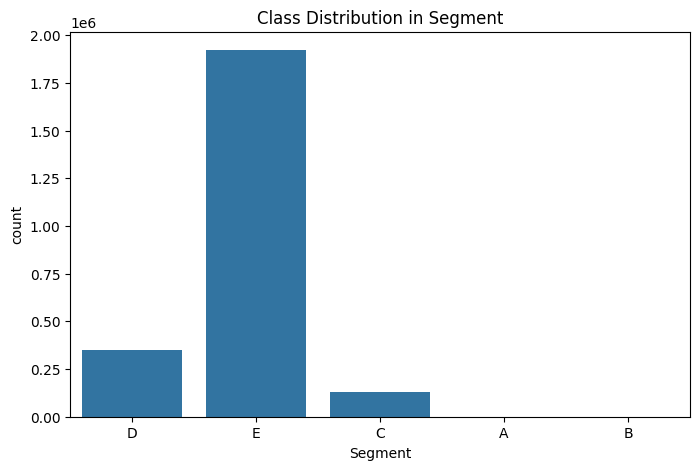

In [ ]:
# Segment 컬럼의 클래스 분포 확인
print(train_df["Segment"].value_counts())

# 시각화로 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x=train_df["Segment"])
plt.title("Class Distribution in Segment")
plt.show()

